### Modelo_tres. ( Mejorando modelo 0.2 )   OneHotEncoder & Normalizado & Desbalanceado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from pylab import rcParams 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier 
from collections import Counter

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [3]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [4]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## LABEL ENCODER

In [5]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [6]:
lbl.fit_transform(df['tipo_gestor'])
lbl.fit_transform(df['esta_carterizado'])
lbl.fit_transform(df['cliente_bbp'])
lbl.fit_transform(df['cartera_patron'])
lbl.fit_transform(df['digital_3_meses'])
lbl.fit_transform(df['camino_digital'])
lbl.fit_transform(df['marca_bp'])
lbl.fit_transform(df['marca_ccte'])
lbl.fit_transform(df['seg_valor'])
lbl.fit_transform(df['seg_recorrido'])


array([1, 0, 1, ..., 3, 3, 0])

In [7]:
df['tipo_gestor_etiqueta']=lbl.fit_transform(df['tipo_gestor'])
df['esta_carterizado_etiqueta']=lbl.fit_transform(df['esta_carterizado'])
df['cliente_bbp_etiqueta']=lbl.fit_transform(df['cliente_bbp'])
df['cartera_patron_etiqueta']=lbl.fit_transform(df['cartera_patron'])
df['digital_3_meses_etiqueta']=lbl.fit_transform(df['digital_3_meses'])
df['camino_digital_etiqueta']=lbl.fit_transform(df['camino_digital'])
df['marca_bp_etiqueta']=lbl.fit_transform(df['marca_bp'])
df['marca_ccte_etiqueta']=lbl.fit_transform(df['marca_ccte'])
df['seg_valor_etiqueta']=lbl.fit_transform(df['seg_valor'])
df['seg_recorrido_etiqueta']=lbl.fit_transform(df['seg_recorrido'])

In [8]:
df['tipo_gestor_etiqueta'].value_counts()

0    403840
1     43144
2      4390
Name: tipo_gestor_etiqueta, dtype: int64

In [9]:
df['tipo_gestor'].value_counts()

ASESOR FINANCIERO          403840
SIN GESTOR                  43144
SUBDIRECCIÓN DE OFICINA      4390
Name: tipo_gestor, dtype: int64

In [10]:
df.dtypes;

In [11]:
df.drop(['tipo_gestor','esta_carterizado','cliente_bbp',
         'cartera_patron','digital_3_meses','camino_digital',
         'marca_bp','marca_ccte','seg_valor','seg_recorrido'],axis = 1,inplace = True)

In [12]:
df.columns

Index(['cliente', 'saldo_captacion', 'gestor', 'codigo_cartera',
       'saldo_financiacion', 'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'edad', 'dz',
       'oficina', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

In [13]:
df.head()

,cliente,saldo_captacion,gestor,codigo_cartera,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,...,tipo_gestor_etiqueta,esta_carterizado_etiqueta,cliente_bbp_etiqueta,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
0,1,1328106.49,18287.0,14881.0,0.0,1301110.59,14304.39,1,1,1,...,0,1,0,0,1,0,0,0,0,1
1,2,1142234.34,18287.0,14881.0,0.0,1112617.83,0.00,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,3,1142234.34,18287.0,28332.0,0.0,1112617.83,0.00,0,0,0,...,0,1,0,2,0,3,0,2,0,1
3,4,1340503.88,41475.0,14204.0,0.0,1076086.83,0.00,1,0,0,...,0,1,0,0,0,3,0,0,0,1
4,5,1758517.70,39000.0,14219.0,0.0,919297.29,109343.49,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [14]:
df.dtypes;

In [15]:
# Convierto variables a object
df[["cliente","gestor",'codigo_cartera','dz','oficina']] = \
df[["cliente", "gestor",'codigo_cartera', 'dz', 'oficina']].astype(object);
df['edad']=df['edad'].astype(int)

In [16]:
df.dtypes;

In [99]:
df_datos_numericos =  df.select_dtypes('number')

## PCA No mejoramos


In [103]:
from sklearn.decomposition import PCA

In [104]:
df_sin_target = df_datos_numericos.drop(['lp_seg_hogar'], axis = 1)

In [105]:
#Instanciamos objeto PCA y aplicamos
pca = PCA() # n = 10 ponemos como numero de pcas 10 
pca.fit(df_sin_target) # obtener los componentes principales
df_transforming = pca.transform(df_sin_target) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [178]:
pca.components_[0]

array([ 9.56920549e-01, -5.51353800e-02,  2.83049038e-01,  3.38584003e-02,
        1.69637147e-07,  4.88658728e-07,  1.65248262e-08,  4.69862931e-07,
       -8.64460088e-08,  5.76304798e-05, -3.61719466e-07, -5.50735858e-08,
        6.31077636e-09,  6.07711366e-08, -2.55125128e-07,  1.99414264e-07,
       -0.00000000e+00, -1.17680684e-06, -3.60161102e-07, -1.73361426e-07,
        2.75199354e-06, -1.41657797e-06, -3.67790026e-06, -2.75305312e-08])

In [107]:
list(zip(df_sin_target.columns, df_transforming[0]))

[('saldo_captacion', 1590383.366265117),
 ('saldo_financiacion', 89239.57155275028),
 ('saldo_ffii', 875708.0688845543),
 ('saldo_plp', -37034.236305277),
 ('lp_dom_ingresos', 38.4040249147477),
 ('lp_tjta_cto', -0.8339240645563182),
 ('lp_tjt_rev', 1.0732206912912532),
 ('lp_rbos', 1.2838936461549766),
 ('lp_of_int', 2.482535986978497),
 ('edad', 0.6592660947440055),
 ('lp_seg_vida', 0.04119495996815771),
 ('lp_seg_acc', 0.43254502418863283),
 ('lp_seg_salud', 0.14852921730678284),
 ('lp_seg_auto', 1.1658352669458774),
 ('tipo_gestor_etiqueta', 1.3042051638454148),
 ('esta_carterizado_etiqueta', 0.3694178651840193),
 ('cliente_bbp_etiqueta', 0.4104262896345681),
 ('cartera_patron_etiqueta', 0.28541541196110387),
 ('digital_3_meses_etiqueta', -0.20528697687760056),
 ('camino_digital_etiqueta', -0.0008273314287705086),
 ('marca_bp_etiqueta', 0.013499323786737828),
 ('marca_ccte_etiqueta', -0.058577660057193955),
 ('seg_valor_etiqueta', -0.02297007319927386),
 ('seg_recorrido_etiqueta', 

In [112]:
print("shape of X_pca", df_transforming.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:3]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada

shape of X_pca (451374, 24)
[7.48398100e-01 1.63565820e-01 7.85645654e-02 9.47148509e-03
 2.90405623e-08 1.33174447e-10 1.06046626e-10 6.87647975e-11
 5.67417091e-11 2.77205524e-11 2.50270921e-11 1.86116339e-11
 1.33502204e-11 1.07682781e-11 9.76096293e-12 8.32654797e-12
 7.97524473e-12 6.99258447e-12 5.19867678e-12 1.69354766e-12
 1.54753580e-12 1.18488766e-12 3.76982018e-13 1.93832148e-44]
suma: 0.9905284853632844


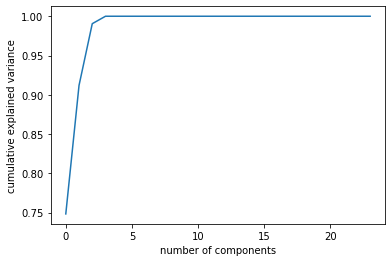

In [109]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show() 

In [114]:
df_pca = pd.DataFrame (data = df_transforming, columns = ['1','2','3','4','5','6','7','8','9',
                                                          '10','11','12','13','14','15','16','17',
                                                          '18','19','20','21','22','23','24'])

In [116]:
finalDf = pd.concat ([df_pca, df_datos_numericos [['lp_seg_hogar']]], axis = 1)

In [117]:
finalDf.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       'lp_seg_hogar'],
      dtype='object')

In [151]:
finalDf = finalDf.drop(['5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'], axis = 1)

In [152]:
finalDf.columns

Index(['1', '2', '3', '4', 'lp_seg_hogar'], dtype='object')

## NORMALIZACION

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
scaler = MinMaxScaler()

In [155]:
#con todos los datos numericos --- df_datos_numericos =  df.select_dtypes('number')

In [156]:
df_normalizado = scaler.fit_transform(finalDf)

In [157]:
columnas_datos_numericos = finalDf.columns

In [158]:
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_datos_numericos)

In [159]:
df_normalizado.head(2)

,1,2,3,4,lp_seg_hogar
0,0.285606,0.037716,0.705719,0.236312,1.0
1,0.247198,0.032449,0.666841,0.224756,0.0


## MODELO

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [161]:
df_normalizado.columns

Index(['1', '2', '3', '4', 'lp_seg_hogar'], dtype='object')

In [162]:
X = df_normalizado.drop(['lp_seg_hogar'], axis = 1)
y= df_normalizado['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 1805496 (451374, 4)
Datos y = 451374 (451374,)


In [163]:
X.shape, y.shape

((451374, 4), (451374,))

In [164]:
X.columns

Index(['1', '2', '3', '4'], dtype='object')

## BALANCEO

###  1ª Estrategia: Penalización para compensar Weigth balanced

In [165]:
# puedo elegir solver liblinear sag y saga. los otros no funcionan
modelo3 = LogisticRegression(solver = 'liblinear', class_weight='balanced')

In [166]:
modelo3.fit(X,y)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [167]:
modelo3.predict(X)

array([1., 1., 1., ..., 0., 0., 0.])

In [168]:
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [169]:
modelo3.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [170]:
modelo3.predict(X_test)

array([0., 0., 1., ..., 1., 1., 0.])

In [171]:
modelo3.predict_proba(X_test)[:, 1]

array([0.41136589, 0.46750276, 0.5418336 , ..., 0.53070289, 0.62501161,
       0.39213785])

[[62829 15661]
 [ 6344  5441]]


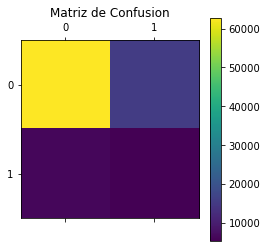

In [172]:
matriz_confusion_modelo3 = confusion_matrix(y_test,modelo3.predict(X_test))
print(matriz_confusion_modelo3)
pl.matshow(confusion_matrix(y_test,modelo3.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [173]:
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,modelo3.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, modelo3.predict(X_test)))

accuracy_score =  0.7562448075325394
precision = 0.2578428584968249
recall = 0.46168858718710226
f1_score = 0.3308906254751117
roc_auc_score = 0.7039714757109599
classification_report
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85     78490
         1.0       0.26      0.46      0.33     11785

    accuracy                           0.76     90275
   macro avg       0.58      0.63      0.59     90275
weighted avg       0.82      0.76      0.78     90275



In [148]:
print('NO TOCAR CON ¡¡''=====================')
print ('accuracy_score = ', accuracy_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,modelo3.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, modelo3.predict(X_test)))

con PCA ====================================
accuracy_score =  0.697402381611742
precision = 0.28648410865500934
recall = 0.8841747984726347
f1_score = 0.43275120958531466
roc_auc_score = 0.8404297345964692
classification_report
              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79     78490
         1.0       0.29      0.88      0.43     11785

    accuracy                           0.70     90275
   macro avg       0.63      0.78      0.61     90275
weighted avg       0.88      0.70      0.75     90275



### 2ª Estrategia: Subsampling en la clase mayoritaria 
    - Con NearMiss
    - Con Smote
https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [35]:
modelo3 = LogisticRegression(solver = 'liblinear')

In [36]:
modelo3.fit(X,y)

LogisticRegression(solver='liblinear')

In [37]:
modelo3.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
# con NearMiss """no mejoramos"""
from imblearn.under_sampling import NearMiss
nr = NearMiss() 

In [39]:
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)  

In [40]:
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_miss)))
 

Distribution before resampling Counter({0.0: 314073, 1.0: 47026})
Distribution after resampling Counter({0.0: 47026, 1.0: 47026})


In [41]:
modelo3.fit(X_train_miss, y_train_miss) 

LogisticRegression(solver='liblinear')

In [42]:
modelo3.predict(X_test)

array([1., 1., 1., ..., 0., 1., 0.])

In [43]:
modelo3.predict_proba(X_test)[:, 1]

array([0.63011501, 0.63468601, 0.94985591, ..., 0.35131455, 0.93391261,
       0.49796154])

In [44]:
# RESULTADOS MODELO_03
print('RESULTADOS MODELO_03')
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,modelo3.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, modelo3.predict(X_test)))


RESULTADOS MODELO_03
accuracy_score =  0.539584602603157
precision = 0.16942341422259719
recall = 0.6475180313958422
f1_score = 0.2685742441840003
roc_auc_score = 0.607437093964879
classification_report
              precision    recall  f1-score   support

         0.0       0.91      0.52      0.66     78490
         1.0       0.17      0.65      0.27     11785

    accuracy                           0.54     90275
   macro avg       0.54      0.59      0.47     90275
weighted avg       0.81      0.54      0.61     90275



In [45]:
# con Smote """ no mejoramos"""
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 

In [46]:
modelo3 = LogisticRegression(solver = 'liblinear')

In [47]:
modelo3.fit(X,y)

LogisticRegression(solver='liblinear')

In [48]:
modelo3.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train) 

In [50]:
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_smote)))

Distribution before resampling Counter({0.0: 314073, 1.0: 47026})
Distribution labels after resampling Counter({0.0: 314073, 1.0: 314073})


In [51]:
modelo3.fit(X_train_smote, y_train_smote) 

LogisticRegression(solver='liblinear')

In [52]:
modelo3.predict(X_test)

array([1., 1., 1., ..., 1., 1., 0.])

In [53]:
modelo3.predict_proba(X_test)[:, 1]

array([0.5861754 , 0.6122282 , 0.70572715, ..., 0.66770824, 0.84914958,
       0.28490886])

In [54]:
# RESULTADOS MODELO_03
print('RESULTADOS MODELO_03')
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,modelo3.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, modelo3.predict(X_test)))


RESULTADOS MODELO_03
accuracy_score =  0.6947106064801994
precision = 0.2849352419904567
recall = 0.886720407297412
f1_score = 0.4312835328105654
roc_auc_score = 0.8409923890652874
classification_report
              precision    recall  f1-score   support

         0.0       0.98      0.67      0.79     78490
         1.0       0.28      0.89      0.43     11785

    accuracy                           0.69     90275
   macro avg       0.63      0.78      0.61     90275
weighted avg       0.88      0.69      0.74     90275

